In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import matplotlib


matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
%matplotlib inline

In [3]:
df = pd.read_excel("Superstore.xlsx")
furniture = df.loc[df['Category'] == 'Furniture']

In [4]:
furniture

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
21,22,ES-2017-3412387,2017-06-18,2017-06-24,Standard Class,DR-12880,Dan Reichenbach,Corporate,Kassel,Hesse,Germany,Central,FUR-BO-10004620,Furniture,Bookcases,"Safco Stackable Bookrack, Mobile",268.164,2,0.1,5.904
54,55,ES-2017-1324878,2017-07-03,2017-07-08,Standard Class,RR-19315,Ralph Ritter,Consumer,Murcia,Murcia,Spain,South,FUR-BO-10003007,Furniture,Bookcases,"Ikea Stackable Bookrack, Metal",854.280,7,0.0,196.350
58,59,ES-2016-4122424,2016-07-17,2016-07-20,First Class,BE-11335,Bill Eplett,Home Office,Madrid,Madrid,Spain,South,FUR-TA-10004544,Furniture,Tables,"Chromcraft Coffee Table, Fully Assembled",214.848,2,0.6,-247.092
64,65,IT-2017-4707944,2017-08-14,2017-08-16,Second Class,JL-15850,John Lucas,Consumer,Stuttgart,Baden-Württemberg,Germany,Central,FUR-BO-10004408,Furniture,Bookcases,"Dania Stackable Bookrack, Pine",221.292,2,0.1,-22.188
70,71,ES-2014-5287434,2014-04-01,2014-04-05,Standard Class,SA-20830,Sue Ann Reed,Consumer,Newcastle upon Tyne,England,United Kingdom,North,FUR-BO-10004129,Furniture,Bookcases,"Sauder Classic Bookcase, Pine",2624.040,6,0.0,446.040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9956,9957,ES-2017-1035204,2017-08-28,2017-08-30,Second Class,MG-17875,Michael Grace,Home Office,Preston,England,United Kingdom,North,FUR-CH-10002212,Furniture,Chairs,"Hon Chairmat, Black",212.400,4,0.0,8.400
9976,9977,ES-2015-4087601,2015-08-17,2015-08-22,Standard Class,TB-21280,Toby Braunhardt,Consumer,Turku,Finland Proper,Finland,North,FUR-FU-10004960,Furniture,Furnishings,"Deflect-O Photo Frame, Duo Pack",155.880,3,0.0,0.000
9980,9981,ES-2014-3081212,2014-08-28,2014-09-04,Standard Class,VW-21775,Victoria Wilson,Corporate,Helsinki,Uusimaa,Finland,North,FUR-CH-10001831,Furniture,Chairs,"Novimex Rocking Chair, Set of Two",267.360,2,0.0,29.400
9990,9991,ES-2017-5488768,2017-02-07,2017-02-10,First Class,SN-20710,Steve Nguyen,Home Office,Northampton,England,United Kingdom,North,FUR-CH-10002373,Furniture,Chairs,"Office Star Rocking Chair, Set of Two",429.480,3,0.0,17.100


In [5]:
furniture['Order Date'].min(), furniture['Order Date'].max() ## to know the time range 

(Timestamp('2014-01-03 00:00:00'), Timestamp('2017-12-31 00:00:00'))

In [6]:
furniture.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [7]:
#df.groupby([df['Segment'],pd.Grouper(freq='Min')])   ### TODO!!

In [8]:
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index() ## resample ou group by ...

In [9]:
furniture = furniture.set_index('Order Date')
furniture.index

DatetimeIndex(['2014-01-03', '2014-01-06', '2014-01-07', '2014-01-08',
               '2014-01-11', '2014-01-12', '2014-01-15', '2014-01-22',
               '2014-01-24', '2014-01-25',
               ...
               '2017-12-19', '2017-12-20', '2017-12-22', '2017-12-23',
               '2017-12-24', '2017-12-25', '2017-12-26', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Order Date', length=776, freq=None)

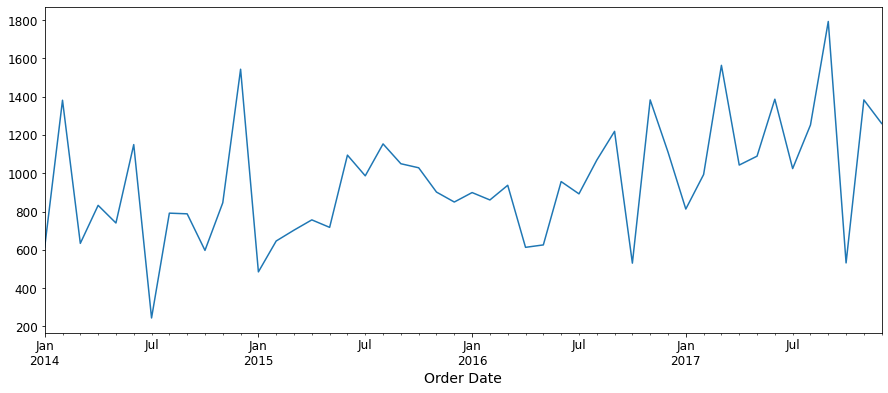

In [10]:
furniture['Sales'].resample('MS').mean().plot(figsize=(15, 6)) ## resample, because we have day time we can ...

In [11]:
y = furniture['Sales'].resample('MS').mean()

In [12]:
y

Order Date
2014-01-01     613.792364
2014-02-01    1380.977700
2014-03-01     633.646714
2014-04-01     832.138333
2014-05-01     739.923125
2014-06-01    1149.344600
2014-07-01     244.102333
2014-08-01     791.406176
2014-09-01     787.889333
2014-10-01     597.043071
2014-11-01     845.782765
2014-12-01    1542.838000
2015-01-01     484.777154
2015-02-01     646.094700
2015-03-01     702.754200
2015-04-01     756.329500
2015-05-01     717.183429
2015-06-01    1094.312348
2015-07-01     986.297500
2015-08-01    1152.946636
2015-09-01    1049.432609
2015-10-01    1028.266100
2015-11-01     901.471333
2015-12-01     849.506526
2016-01-01     898.896000
2016-02-01     860.303824
2016-03-01     936.972214
2016-04-01     612.922500
2016-05-01     625.579594
2016-06-01     956.231674
2016-07-01     892.155529
2016-08-01    1068.094957
2016-09-01    1218.546150
2016-10-01     530.335050
2016-11-01    1382.675714
2016-12-01    1110.486083
2017-01-01     812.868000
2017-02-01     993.128357
2

## Seasonal Study

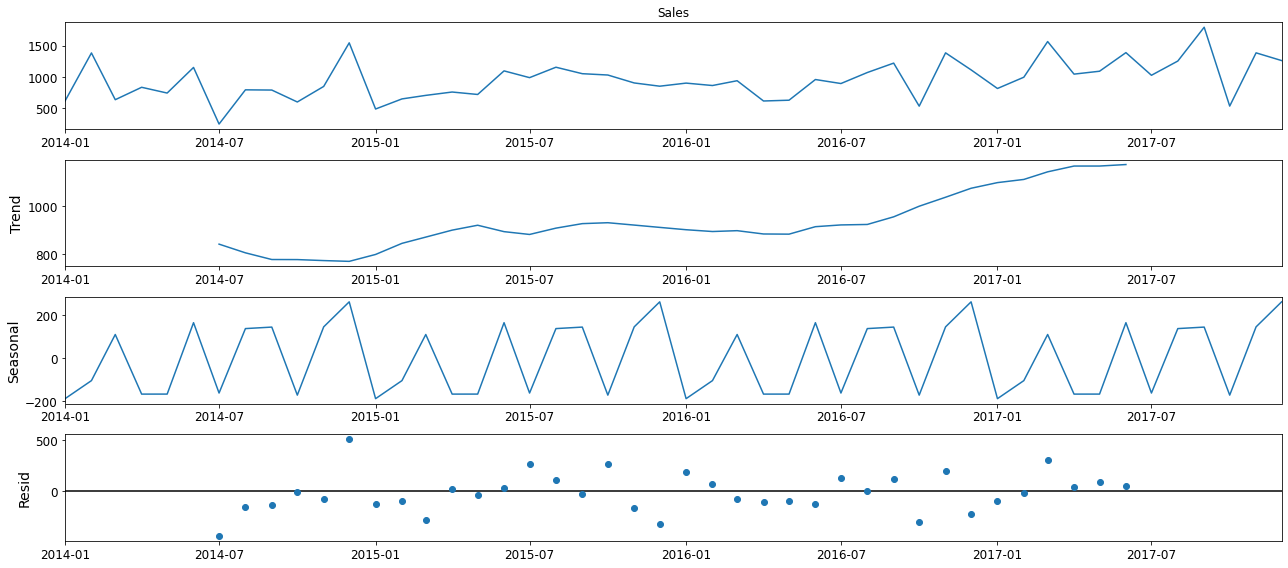

In [13]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive') ## model becomes multiplicative isntead of aditive 
fig = decomposition.plot()
plt.show()

## ARIMA model

This acronym is descriptive, capturing the key aspects of the model itself. Briefly, they are:

**AR: Autoregression.** A model that uses the dependent relationship between an observation and some number of lagged observations.

**I: Integrated.** The use of differencing of raw observations (e.g. subtracting an observation from an observation at the previous time step) in order to make the time series stationary.

**MA: Moving Average.** A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.

A standard notation is used of ARIMA(p,d,q) where the parameters are substituted with integer values to quickly indicate the specific ARIMA model being used.

The parameters of the ARIMA model are based on:

**p (seasonality)**: The number of lag observations included in the model, also called the lag order.

**d (trend)**: The number of times that the raw observations are differenced, also called the degree of differencing.

**q (noise)**: The size of the moving average window, also called the order of moving average.

In [14]:
from statsmodels.tsa.stattools import adfuller

adfuller(y, autolag = 'AIC') ## Hypotesis teststing that our data is stationary ( it doesnt change on the windom (time))


## how much is stationary my data - stationary - the mean keeps the same . the statistics are not changing 

(-1.0391090320118914,
 0.7387343683708109,
 5,
 42,
 {'1%': -3.596635636000432,
  '5%': -2.933297331821618,
  '10%': -2.6049909750566895},
 527.8912249908327)

C:\Users\jinve\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\jinve\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                  775
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -6497.138
Method:                       css-mle   S.D. of innovations           1057.711
Date:                Thu, 06 Aug 2020   AIC                          13008.277
Time:                        08:17:22   BIC                          13040.847
Sample:                             1   HQIC                         13020.807
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.9270     11.499      0.081      0.936     -21.610      23.464
ar.L1.D.Sales    -0.7939      0.036    -22.358      0.000      -0.863      -0.724
ar.L2.D.Sales    -0.6186      0.045    -

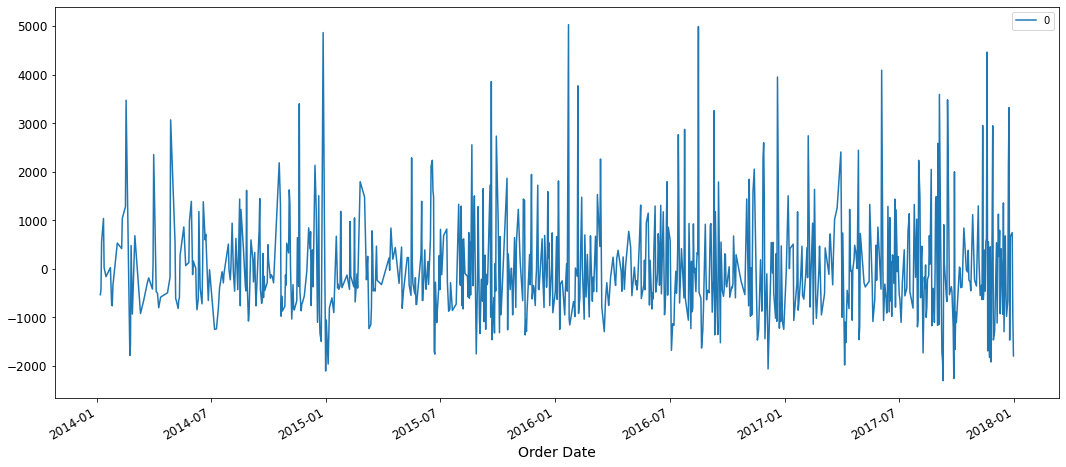

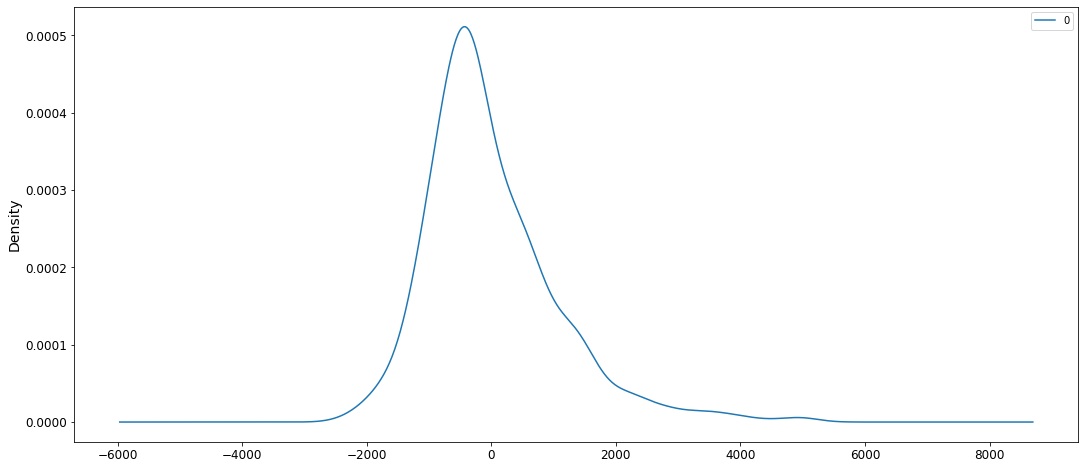

                 0
count   775.000000
mean     -0.189726
std    1058.538759
min   -2300.671338
25%    -650.684307
50%    -249.086337
75%     493.245100
max    5029.983284


In [15]:
from statsmodels.tsa.arima_model import ARIMA
 
model = ARIMA(furniture, order=(5,1,0))
model_fit = model.fit(disp=0)

print(model_fit.summary())

# plot residual errors: residual of an observed value is 
# the difference between the observed value and the estimated value of the quantity of interest 
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

## Forecasting

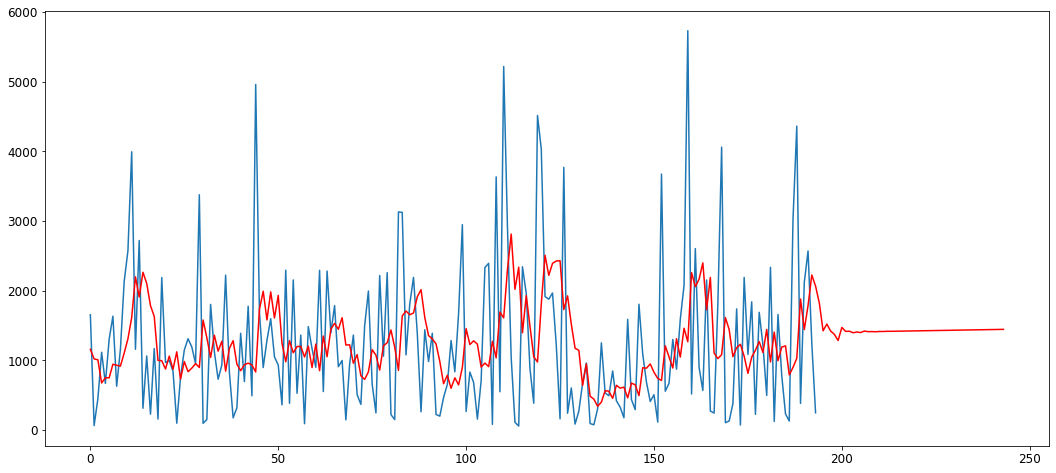

In [22]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
 
X = furniture.values
size = int(len(X) * 0.75)   # Split percentage

train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

for t in range(len(test)+3):
    model = ARIMA(history, order=(5,1,0)) ## history is for having our observation for each point 
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    if t < len(test):
        obs = test[t]
        history.append(obs)
    else:
        history.append(yhat)
    # print('predicted=%f, expected=%f' % (yhat, obs))
    #print(output)
    
#error = mean_squared_error(test, predictions)
#print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [17]:
X = furniture.values
X


array([[ 854.49  ],
       [ 324.45  ],
       [ 155.358 ],
       [ 986.904 ],
       [1652.274 ],
       [ 841.71  ],
       [ 652.32  ],
       [ 825.36  ],
       [ 142.176 ],
       [  20.13  ],
       [ 296.544 ],
       [ 995.976 ],
       [ 903.204 ],
       [1601.82  ],
       [2002.149 ],
       [4544.1   ],
       [1003.02  ],
       [ 102.78  ],
       [  47.352 ],
       [2076.    ],
       [ 533.376 ],
       [2019.    ],
       [  74.49  ],
       [ 253.692 ],
       [ 419.52  ],
       [ 769.65  ],
       [ 170.04  ],
       [ 729.135 ],
       [2774.328 ],
       [ 507.276 ],
       [ 381.96  ],
       [  63.84  ],
       [ 256.95  ],
       [  65.784 ],
       [ 154.392 ],
       [  45.072 ],
       [3239.643 ],
       [1300.077 ],
       [ 311.04  ],
       [ 151.38  ],
       [ 169.92  ],
       [  92.421 ],
       [ 196.74  ],
       [ 627.276 ],
       [1145.88  ],
       [ 507.6   ],
       [ 607.716 ],
       [1540.392 ],
       [2228.6355],
       [1029.375 ],


In [17]:
## forcasting dont work with peacks 

## we will need smooth them 

In [24]:
history[-3:]

[array([1440.91149478]), array([1441.85096442]), array([1442.76542108])]

<ipython-input-54-1276fda32c99>:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wave_dir["value"]=df_wave_dir["value"].replace(["nothing","dir"],np.NaN).astype(float)
<ipython-input-54-1276fda32c99>:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wave_dir["value"]=df_wave_dir["value"].interpolate(method ='linear', limit_direction ='forward')
<ipython-input-54-1276fda32c99>:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

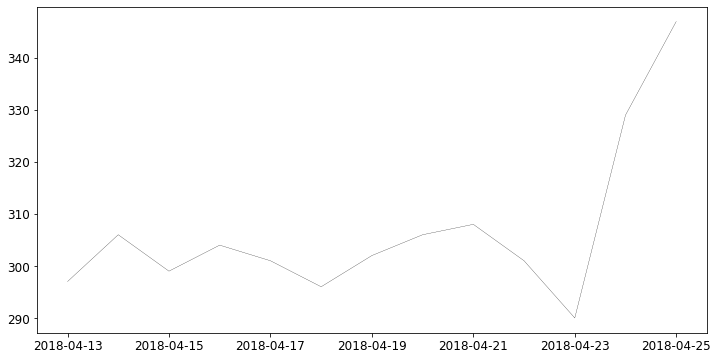

In [54]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from pylab import rcParams
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.metrics import mean_squared_error


import random


import warnings
import time


df1=pd.read_csv("../df_Ericeira_2008-11-22-2012-12-31.csv")
df2=pd.read_csv("../df_Ericeira_2013-01-01-2016-12-31.csv")
df3=pd.read_csv("../df_Ericeira_2017-01-01-2020-02-29.csv")

df12=pd.concat([df1,df2], axis=1,ignore_index=True)
df123=pd.concat([df12,df3], axis=1,ignore_index=True)

df123.drop(columns=[1503,1504,2966,2967],inplace=True)

df123.reset_index(inplace=True,drop=True)

df123.columns = df123.iloc[0]

df123.drop(index=[0],inplace=True)
new_names = df123.columns
new_names=list(new_names)

new_names[0] = 'metric name'
new_names[1] = 'time'

df123.columns = new_names

df123[df123["metric name"]=="Rain (mm/1h)"] =df123[df123["metric name"]=="Rain (mm/1h)"].fillna(value=0)

df123melt=pd.melt(df123, id_vars = ['metric name','time'])


df123melt["date_time"]=pd.to_datetime(df123melt["variable"]+" "+df123melt["time"], dayfirst=True)
df123melt.drop(columns=["time"],inplace=True) #["time","variable"]

df123melt=df123melt[['metric name', "variable", 'date_time','value']]



#Wave dir clean
df_wave_dir=df123melt[df123melt['metric name']=="Wave direction"]
df_wave_dir.reset_index(inplace=True,drop=True)
df_wave_dir["value"]=df_wave_dir["value"].replace(["nothing","dir"],np.NaN).astype(float)
df_wave_dir["value"]=df_wave_dir["value"].interpolate(method ='linear', limit_direction ='forward')

df_wave_dir["value"]=(df_wave_dir["value"]-360+180)

#Wave dir clean group day
df_wave_dir_day=df_wave_dir.groupby(by="variable", sort=True).mean().reset_index()
df_wave_dir_day["variable"]=pd.to_datetime(df_wave_dir_day["variable"],dayfirst=True)
df_wave_dir_day.sort_values(by="variable", ascending=True,inplace=True)
df_wave_dir_day.reset_index(inplace=True,drop=True)
df_wave_dir_day.columns=["date_time","value"]

df_wave_dir_day["value"]=df_wave_dir_day["value"].apply(round)


#Time period
s_from="2018-04-13 00:00:00"
s_to="2018-04-25 00:00:00"
series_wave_dir_day=pd.Series(df_wave_dir_day[(df_wave_dir_day["date_time"]>= s_from) & (df_wave_dir_day["date_time"]<=s_to)]["value"])
series_wave_dir_day.index=df_wave_dir_day[(df_wave_dir_day["date_time"]>=s_from) & (df_wave_dir_day["date_time"]<=s_to)]["date_time"]

plt.figure(figsize=(12,6))
plt.plot(series_wave_dir_day.index,series_wave_dir_day,linewidth=0.25,color='k')
plt.show()

In [70]:
period=pd.DataFrame(series_wave_dir_day)
period.columns=["Wave Direction (º)"]
period

,Wave Direction (º)
date_time,
2018-04-13,297
2018-04-14,306
2018-04-15,299
2018-04-16,304
2018-04-17,301
2018-04-18,296
2018-04-19,302
2018-04-20,306
2018-04-21,308


<ipython-input-67-12cb5adff11f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wave["value"]=df_wave["value"].replace("-",np.NaN).astype(float)
<ipython-input-67-12cb5adff11f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wave["value"]=df_wave["value"].interpolate(method ='linear', limit_direction ='forward')


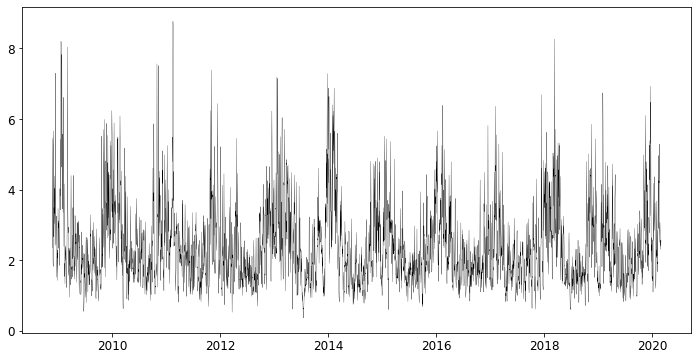

In [67]:
df_wave=df123melt[df123melt['metric name']=="Wave (m)"]
df_wave.reset_index(inplace=True,drop=True)
df_wave["value"]=df_wave["value"].replace("-",np.NaN).astype(float)
df_wave["value"]=df_wave["value"].interpolate(method ='linear', limit_direction ='forward')


#Group by Wave per day
df_wave_day=df_wave.groupby(by="variable", sort=True).mean().reset_index()
df_wave_day["variable"]=pd.to_datetime(df_wave_day["variable"],dayfirst=True)
df_wave_day.sort_values(by="variable", ascending=True,inplace=True)
df_wave_day.reset_index(inplace=True,drop=True)
df_wave_day.columns=["date_time","value"]


#Decomposition_waves BY DAY
plt.figure(figsize=(12,6))
plt.plot(df_wave_day["date_time"],df_wave_day["value"],linewidth=0.25,color='k')
plt.show()

s_from="2018-04-13 00:00:00"
s_to="2018-04-25 00:00:00"
series_wave_day=pd.Series(df_wave_day[(df_wave_day["date_time"]>= s_from) & (df_wave_day["date_time"]<=s_to)]["value"])
series_wave_day.index=df_wave_day[(df_wave_day["date_time"]>=s_from) & (df_wave_day["date_time"]<=s_to)]["date_time"]

In [69]:
pd.DataFrame(series_wave_day)

,value
date_time,
2018-04-13,5.3125
2018-04-14,2.8625
2018-04-15,3.2375
2018-04-16,3.2375
2018-04-17,4.0500
2018-04-18,4.3750
2018-04-19,3.1625
2018-04-20,2.8125
2018-04-21,1.9625


<ipython-input-72-7ab7c057a9e8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_period["value"]=df_period["value"].replace("-",np.NaN).astype(float)
<ipython-input-72-7ab7c057a9e8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_period["value"]=df_period["value"].interpolate(method ='linear', limit_direction ='forward')


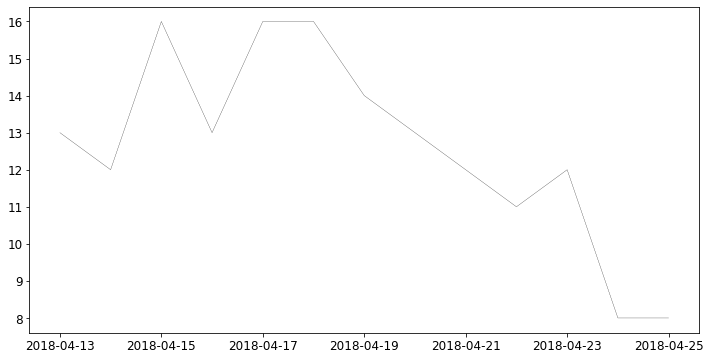

In [72]:
#PERIOD

df_period=df123melt[df123melt['metric name']=="Wave period (s)"]
df_period.reset_index(inplace=True,drop=True)
df_period["value"]=df_period["value"].replace("-",np.NaN).astype(float)
df_period["value"]=df_period["value"].interpolate(method ='linear', limit_direction ='forward')

#Wave dir clean group day
df_period_day=df_period.groupby(by="variable", sort=True).mean().reset_index()
df_period_day["variable"]=pd.to_datetime(df_period_day["variable"],dayfirst=True)
df_period_day.sort_values(by="variable", ascending=True,inplace=True)
df_period_day.reset_index(inplace=True,drop=True)
df_period_day.columns=["date_time","value"]

df_period_day["value"]=df_period_day["value"].apply(round)

#Time period
s_from="2018-04-13 00:00:00"
s_to="2018-04-25 00:00:00"
series_period_day=pd.Series(df_period_day[(df_period_day["date_time"]>= s_from) & (df_period_day["date_time"]<=s_to)]["value"])
series_period_day.index=df_period_day[(df_period_day["date_time"]>=s_from) & (df_period_day["date_time"]<=s_to)]["date_time"]

plt.figure(figsize=(12,6))
plt.plot(series_period_day.index,series_period_day,linewidth=0.25,color='k')
plt.show()

In [73]:
pd.DataFrame(series_period_day)

,value
date_time,
2018-04-13,13
2018-04-14,12
2018-04-15,16
2018-04-16,13
2018-04-17,16
2018-04-18,16
2018-04-19,14
2018-04-20,13
2018-04-21,12


<ipython-input-74-b062a50f23f1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wave["value"]=df_wave["value"].replace("-",np.NaN).astype(float)
<ipython-input-74-b062a50f23f1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wave["value"]=df_wave["value"].interpolate(method ='linear', limit_direction ='forward')


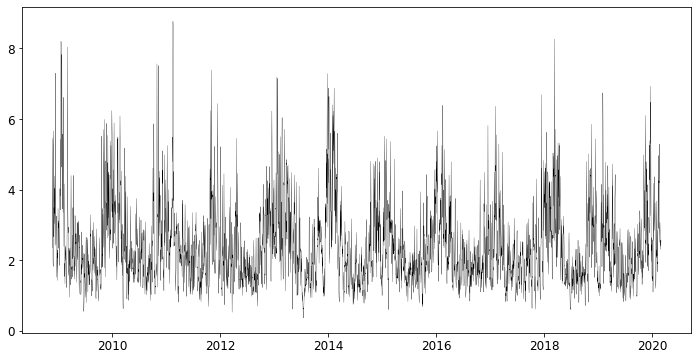

In [74]:
df_wave=df123melt[df123melt['metric name']=="Wave (m)"]
df_wave.reset_index(inplace=True,drop=True)
df_wave["value"]=df_wave["value"].replace("-",np.NaN).astype(float)
df_wave["value"]=df_wave["value"].interpolate(method ='linear', limit_direction ='forward')


#Group by Wave per day
df_wave_day=df_wave.groupby(by="variable", sort=True).mean().reset_index()
df_wave_day["variable"]=pd.to_datetime(df_wave_day["variable"],dayfirst=True)
df_wave_day.sort_values(by="variable", ascending=True,inplace=True)
df_wave_day.reset_index(inplace=True,drop=True)
df_wave_day.columns=["date_time","value"]


#Decomposition_waves BY DAY
plt.figure(figsize=(12,6))
plt.plot(df_wave_day["date_time"],df_wave_day["value"],linewidth=0.25,color='k')
plt.show()

s_from="2018-08-17 00:00:00"
s_to="2018-08-28 00:00:00"
series_wave_day=pd.Series(df_wave_day[(df_wave_day["date_time"]>= s_from) & (df_wave_day["date_time"]<=s_to)]["value"])
series_wave_day.index=df_wave_day[(df_wave_day["date_time"]>=s_from) & (df_wave_day["date_time"]<=s_to)]["date_time"]

In [75]:
pd.DataFrame(series_wave_day)

,value
date_time,
2018-08-17,2.5625
2018-08-18,2.2250
2018-08-19,1.4250
2018-08-20,1.4125
2018-08-21,1.1125
2018-08-22,0.9250
2018-08-23,0.8000
2018-08-24,1.3625
2018-08-25,2.3875


<ipython-input-76-0f8fcf029d52>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_period["value"]=df_period["value"].replace("-",np.NaN).astype(float)
<ipython-input-76-0f8fcf029d52>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_period["value"]=df_period["value"].interpolate(method ='linear', limit_direction ='forward')


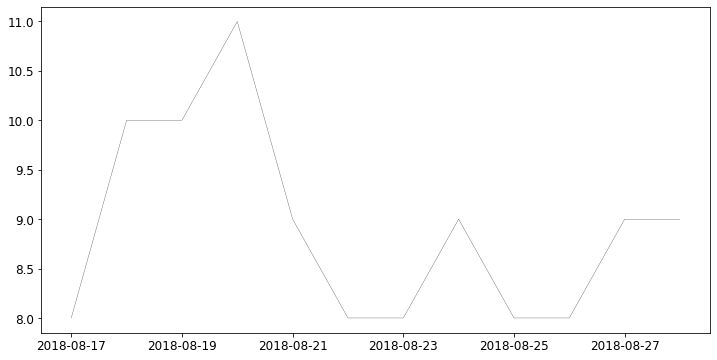

In [76]:
#PERIOD

df_period=df123melt[df123melt['metric name']=="Wave period (s)"]
df_period.reset_index(inplace=True,drop=True)
df_period["value"]=df_period["value"].replace("-",np.NaN).astype(float)
df_period["value"]=df_period["value"].interpolate(method ='linear', limit_direction ='forward')

#Wave dir clean group day
df_period_day=df_period.groupby(by="variable", sort=True).mean().reset_index()
df_period_day["variable"]=pd.to_datetime(df_period_day["variable"],dayfirst=True)
df_period_day.sort_values(by="variable", ascending=True,inplace=True)
df_period_day.reset_index(inplace=True,drop=True)
df_period_day.columns=["date_time","value"]

df_period_day["value"]=df_period_day["value"].apply(round)

#Time period
s_from="2018-08-17 00:00:00"
s_to="2018-08-28 00:00:00"
series_period_day=pd.Series(df_period_day[(df_period_day["date_time"]>= s_from) & (df_period_day["date_time"]<=s_to)]["value"])
series_period_day.index=df_period_day[(df_period_day["date_time"]>=s_from) & (df_period_day["date_time"]<=s_to)]["date_time"]

plt.figure(figsize=(12,6))
plt.plot(series_period_day.index,series_period_day,linewidth=0.25,color='k')
plt.show()

In [77]:
pd.DataFrame(series_period_day)

,value
date_time,
2018-08-17,8
2018-08-18,10
2018-08-19,10
2018-08-20,11
2018-08-21,9
2018-08-22,8
2018-08-23,8
2018-08-24,9
2018-08-25,8


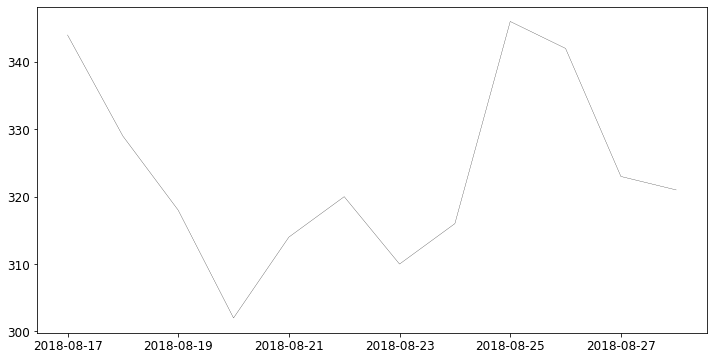

In [78]:

#Time period
s_from="2018-08-17 00:00:00"
s_to="2018-08-28 00:00:00"
series_wave_dir_day=pd.Series(df_wave_dir_day[(df_wave_dir_day["date_time"]>= s_from) & (df_wave_dir_day["date_time"]<=s_to)]["value"])
series_wave_dir_day.index=df_wave_dir_day[(df_wave_dir_day["date_time"]>=s_from) & (df_wave_dir_day["date_time"]<=s_to)]["date_time"]

plt.figure(figsize=(12,6))
plt.plot(series_wave_dir_day.index,series_wave_dir_day,linewidth=0.25,color='k')
plt.show()
print()

In [79]:
pd.DataFrame(series_wave_dir_day)

,value
date_time,
2018-08-17,344
2018-08-18,329
2018-08-19,318
2018-08-20,302
2018-08-21,314
2018-08-22,320
2018-08-23,310
2018-08-24,316
2018-08-25,346


In [82]:
s_from="2018-12-14 00:00:00"
s_to="2018-12-26 00:00:00"
series_wave_day=pd.Series(df_wave_day[(df_wave_day["date_time"]>= s_from) & (df_wave_day["date_time"]<=s_to)]["value"])
series_wave_day.index=df_wave_day[(df_wave_day["date_time"]>=s_from) & (df_wave_day["date_time"]<=s_to)]["date_time"]
pd.DataFrame(series_wave_day)

,value
date_time,
2018-12-14,4.6375
2018-12-15,3.9375
2018-12-16,3.8250
2018-12-17,3.0375
2018-12-18,3.9625
2018-12-19,3.6375
2018-12-20,3.2750
2018-12-21,2.2625
2018-12-22,1.9250


In [84]:
#Time period
s_from="2018-12-14 00:00:00"
s_to="2018-12-26 00:00:00"
series_wave_dir_day=pd.Series(df_wave_dir_day[(df_wave_dir_day["date_time"]>= s_from) & (df_wave_dir_day["date_time"]<=s_to)]["value"])
series_wave_dir_day.index=df_wave_dir_day[(df_wave_dir_day["date_time"]>=s_from) & (df_wave_dir_day["date_time"]<=s_to)]["date_time"]
pd.DataFrame(series_wave_dir_day)

,value
date_time,
2018-12-14,305
2018-12-15,305
2018-12-16,296
2018-12-17,299
2018-12-18,297
2018-12-19,294
2018-12-20,313
2018-12-21,323
2018-12-22,306


In [85]:
#Time period
s_from="2018-12-14 00:00:00"
s_to="2018-12-26 00:00:00"
series_period_day=pd.Series(df_period_day[(df_period_day["date_time"]>= s_from) & (df_period_day["date_time"]<=s_to)]["value"])
series_period_day.index=df_period_day[(df_period_day["date_time"]>=s_from) & (df_period_day["date_time"]<=s_to)]["date_time"]
pd.DataFrame(series_period_day)

,value
date_time,
2018-12-14,15
2018-12-15,17
2018-12-16,14
2018-12-17,13
2018-12-18,14
2018-12-19,13
2018-12-20,13
2018-12-21,13
2018-12-22,12


<ipython-input-86-5f172dd54751>:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wave["value"]=df_wave["value"].replace("-",np.NaN).astype(float)
<ipython-input-86-5f172dd54751>:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wave["value"]=df_wave["value"].interpolate(method ='linear', limit_direction ='forward')


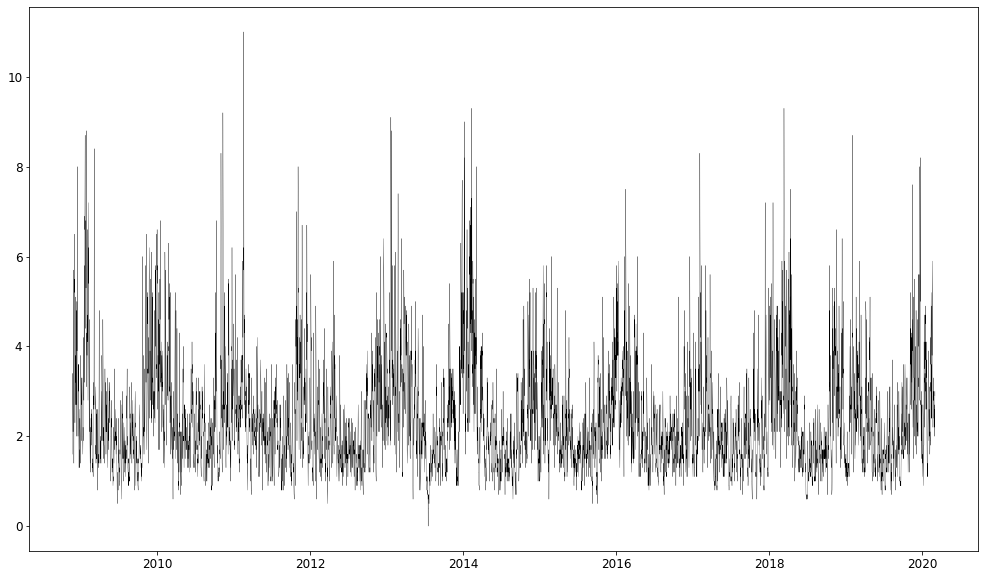

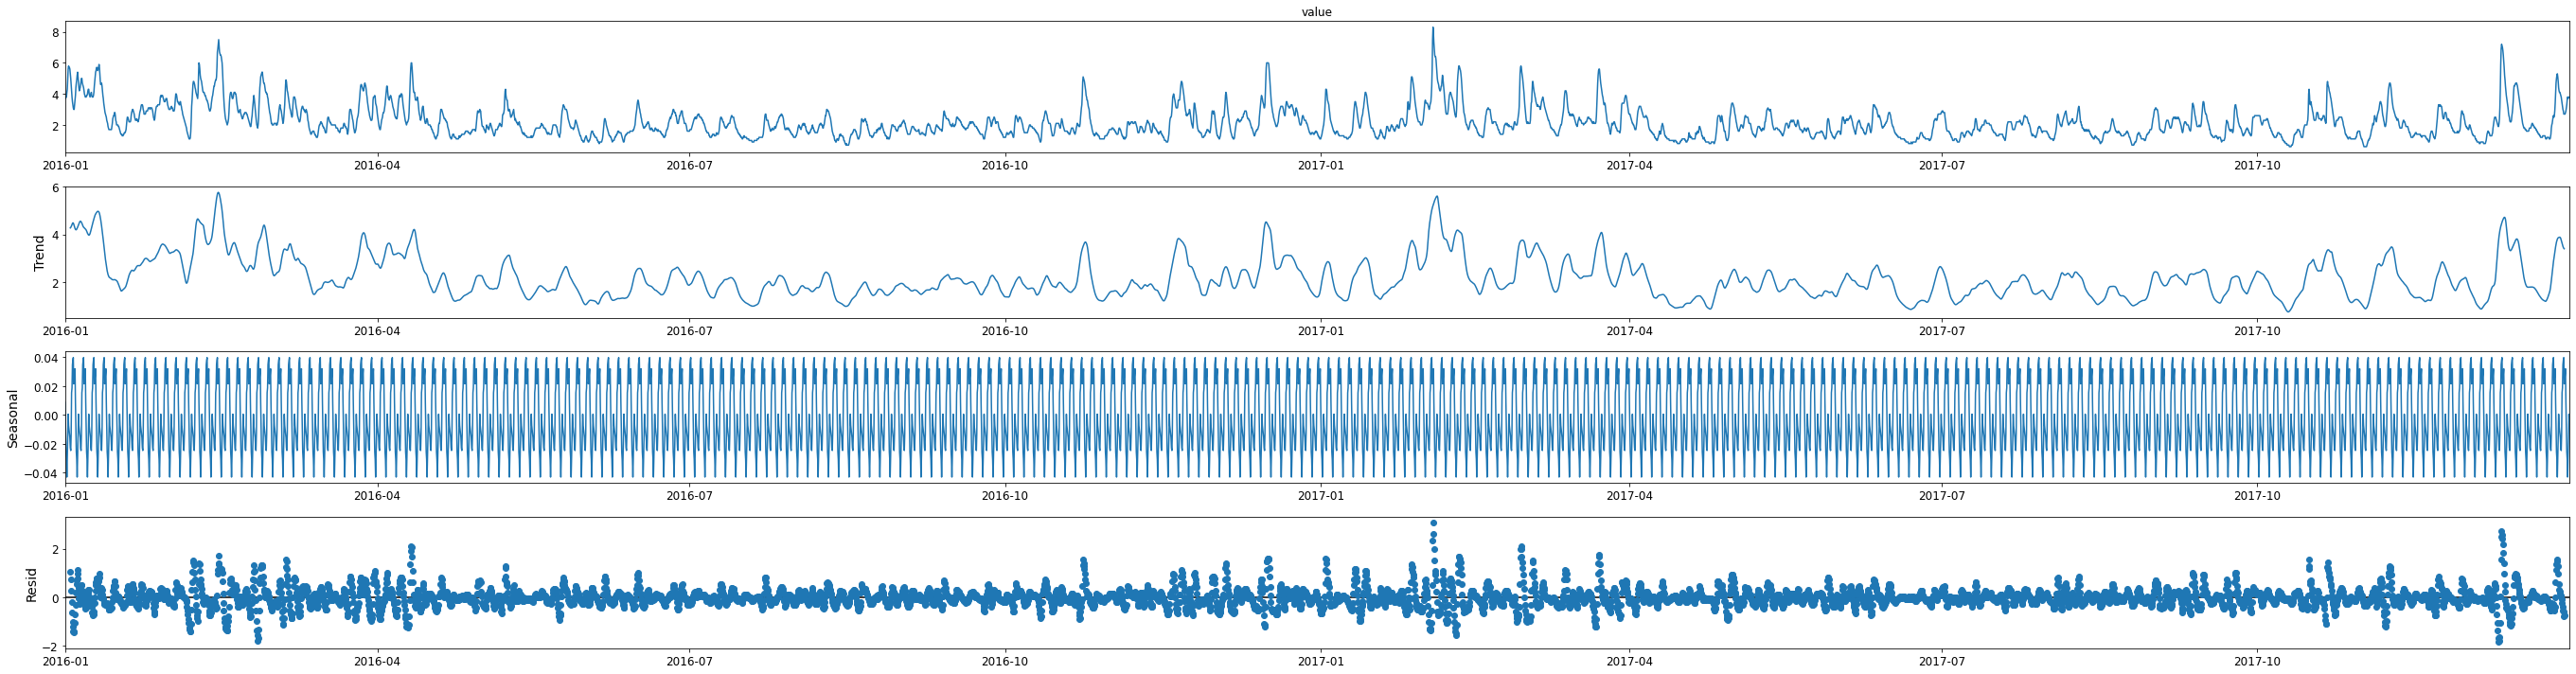

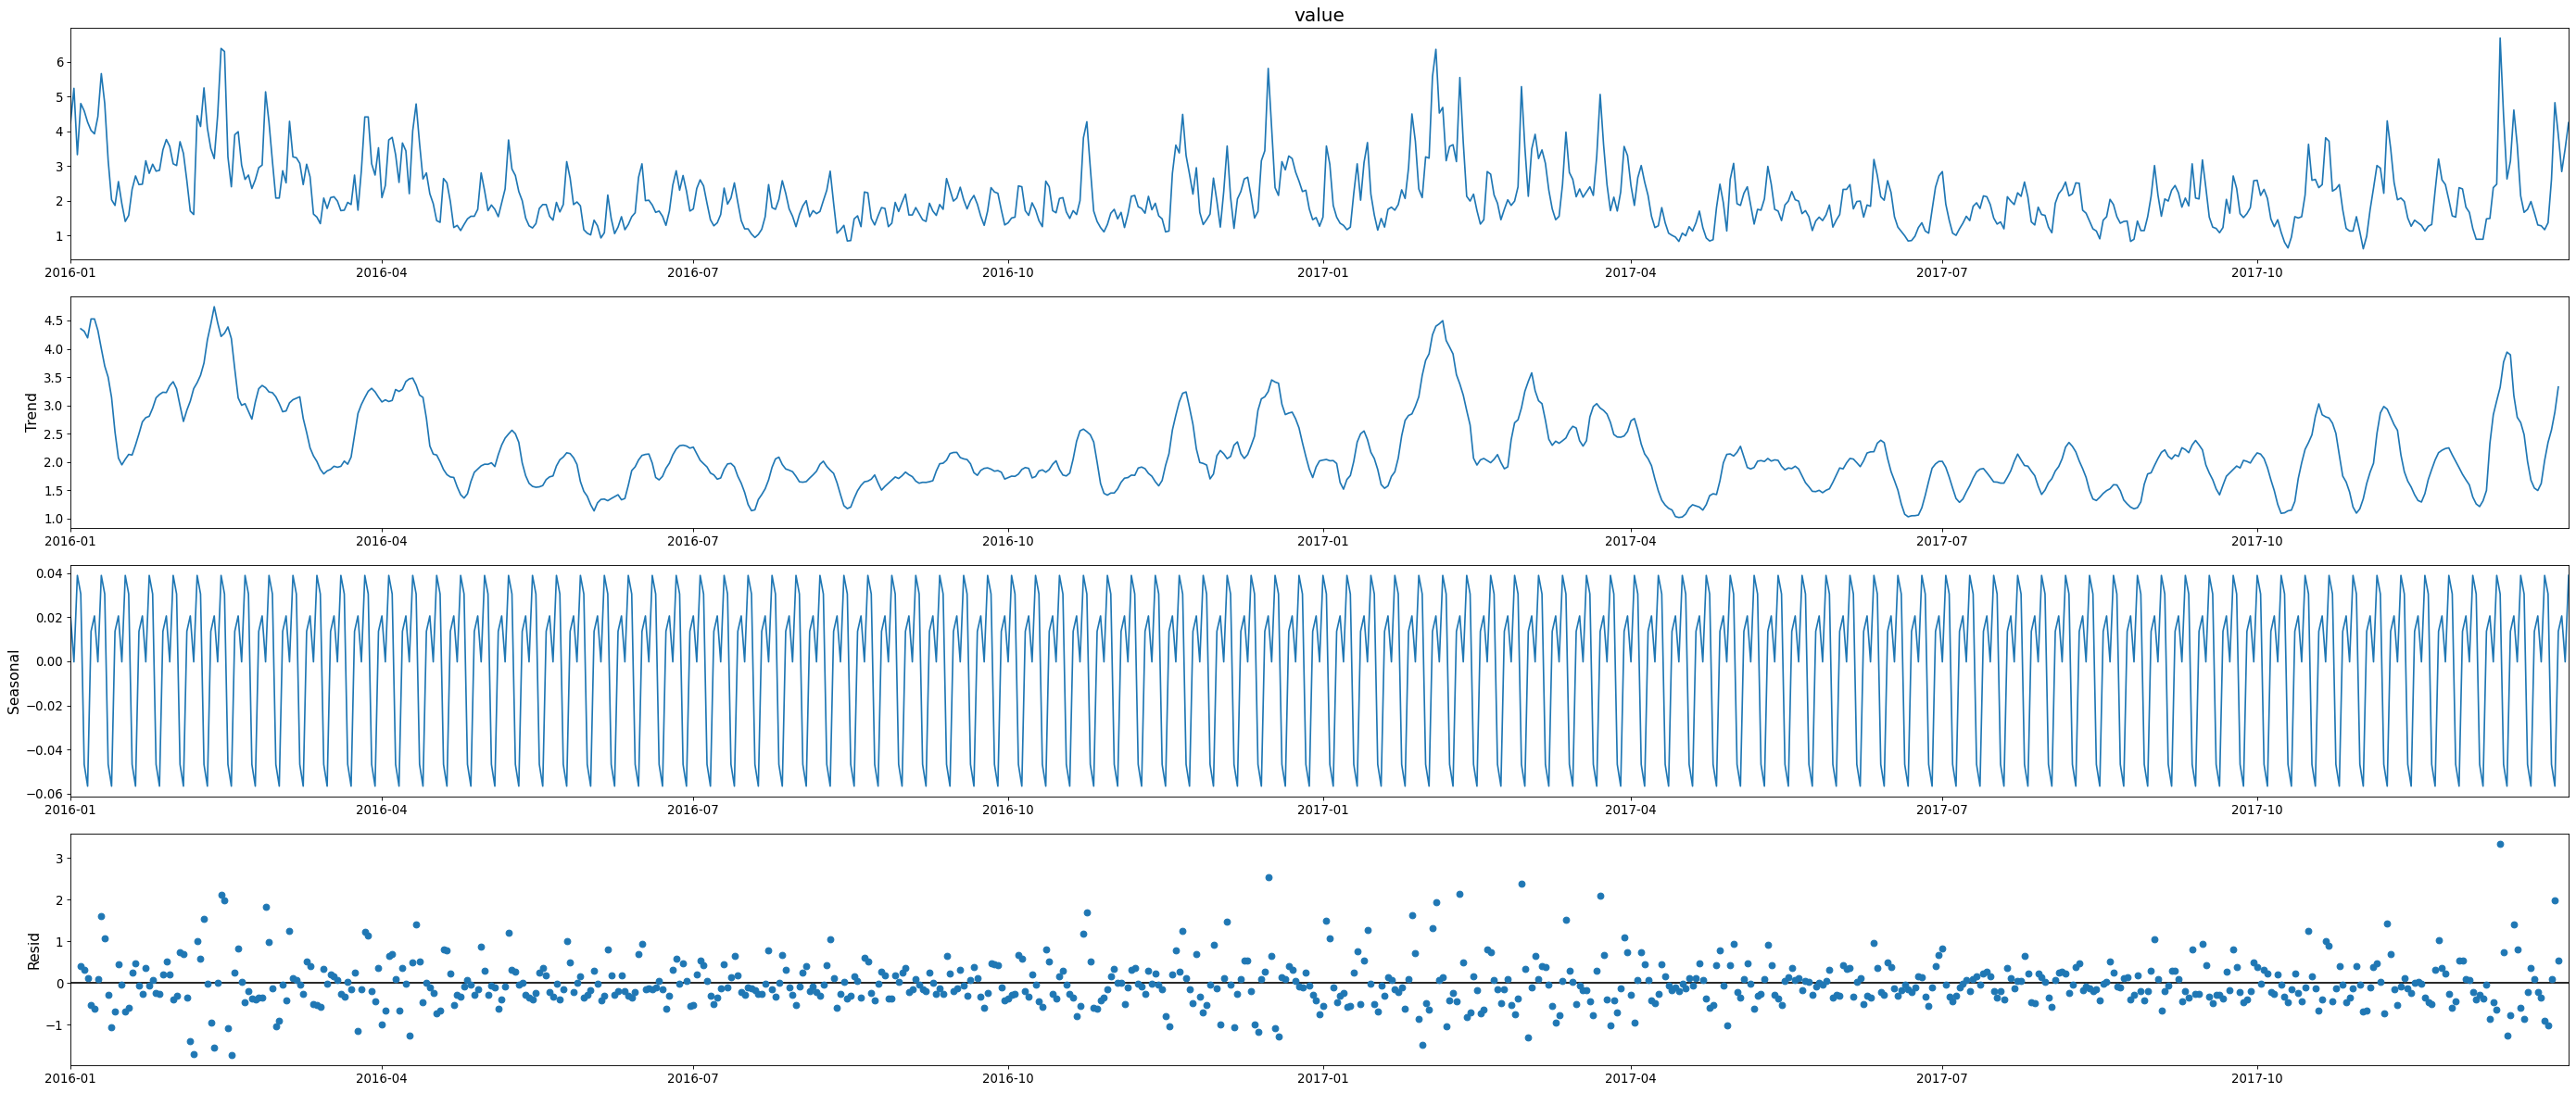

ARIMA(1, 0, 0) MSE=0.351
ARIMA(1, 0, 1) MSE=0.345
ARIMA(1, 0, 2) MSE=0.346
ARIMA(1, 1, 0) MSE=0.405
ARIMA(1, 1, 1) MSE=0.350
ARIMA(1, 1, 2) MSE=0.341
ARIMA(1, 2, 0) MSE=0.725
ARIMA(2, 0, 0) MSE=0.348
ARIMA(2, 0, 1) MSE=0.344
ARIMA(2, 0, 2) MSE=0.340
ARIMA(2, 1, 0) MSE=0.369
ARIMA(2, 1, 1) MSE=0.345
ARIMA(2, 1, 2) MSE=0.341
ARIMA(2, 2, 0) MSE=0.581
ARIMA(4, 0, 0) MSE=0.338
ARIMA(4, 0, 1) MSE=0.334
ARIMA(4, 0, 2) MSE=0.339
ARIMA(4, 1, 0) MSE=0.379
ARIMA(4, 1, 1) MSE=0.337
ARIMA(4, 1, 2) MSE=0.340
ARIMA(4, 2, 0) MSE=0.472
ARIMA(6, 0, 0) MSE=0.349
ARIMA(6, 0, 1) MSE=0.343
ARIMA(6, 0, 2) MSE=0.338
ARIMA(6, 1, 0) MSE=0.387
ARIMA(6, 1, 1) MSE=0.349
ARIMA(6, 1, 2) MSE=0.341
ARIMA(6, 2, 0) MSE=0.470
ARIMA(8, 0, 0) MSE=0.356
ARIMA(8, 0, 1) MSE=0.357
ARIMA(8, 0, 2) MSE=0.353
ARIMA(8, 1, 0) MSE=0.384
ARIMA(8, 2, 0) MSE=0.456
ARIMA(8, 2, 1) MSE=0.385
Best ARIMA(4, 0, 1) MSE=0.334
Total time: 308.13826328516006min


In [86]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from pylab import rcParams
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import random

import warnings
import time



df1=pd.read_csv("../df_Ericeira_2008-11-22-2012-12-31.csv")
df2=pd.read_csv("../df_Ericeira_2013-01-01-2016-12-31.csv")
df3=pd.read_csv("../df_Ericeira_2017-01-01-2020-02-29.csv")

df12=pd.concat([df1,df2], axis=1,ignore_index=True)
df123=pd.concat([df12,df3], axis=1,ignore_index=True)

df123.drop(columns=[1503,1504,2966,2967],inplace=True)

df123.reset_index(inplace=True,drop=True)

df123.columns = df123.iloc[0]

df123.drop(index=[0],inplace=True)
new_names = df123.columns
new_names=list(new_names)

new_names[0] = 'metric name'
new_names[1] = 'time'

df123.columns = new_names

df123[df123["metric name"]=="Rain (mm/1h)"] =df123[df123["metric name"]=="Rain (mm/1h)"].fillna(value=0)

df123melt=pd.melt(df123, id_vars = ['metric name','time'])


df123melt["date_time"]=pd.to_datetime(df123melt["variable"]+" "+df123melt["time"], dayfirst=True)
df123melt.drop(columns=["time"],inplace=True) #["time","variable"]

df123melt=df123melt[['metric name', "variable", 'date_time','value']]

df_wave=df123melt[df123melt['metric name']=="Wave (m)"]
df_wave.reset_index(inplace=True,drop=True)
df_wave["value"]=df_wave["value"].replace("-",np.NaN).astype(float)
df_wave["value"]=df_wave["value"].interpolate(method ='linear', limit_direction ='forward')

#Plot waves H
plt.figure(figsize=(17,10))
plt.plot(df_wave["date_time"],df_wave["value"],linewidth=0.25,color='k')
plt.show()

#Series of 2 cycles time series with sm.tsa.seasonal_decompose
s_from="2016-01-01 00:00:00"
s_to="2017-12-31 00:00:00"
series_wave=pd.Series(df_wave[(df_wave["date_time"]>= s_from) & (df_wave["date_time"]<=s_to)]["value"])
series_wave.index=df_wave[(df_wave["date_time"]>=s_from) & (df_wave["date_time"]<=s_to)]["date_time"]

#Decomposition_waves 
rcParams['figure.figsize'] = 38,10
decomposition = sm.tsa.seasonal_decompose(series_wave, model='additive') ## model becomes multiplicative isntead of aditive 
fig = decomposition.plot()
plt.show()

#Group by Wave per day
df_wave_day=df_wave.groupby(by="variable", sort=True).mean().reset_index()
df_wave_day["variable"]=pd.to_datetime(df_wave_day["variable"],dayfirst=True)
df_wave_day.sort_values(by="variable", ascending=True,inplace=True)
df_wave_day.reset_index(inplace=True,drop=True)
df_wave_day.columns=["date_time","value"]

#Decomposition_waves BY DAY
"""plt.figure(figsize=(12,6))
plt.plot(df_wave_day["date_time"],df_wave_day["value"],linewidth=0.25,color='k')
plt.show()"""

s_from="2016-01-01 00:00:00"
s_to="2017-12-31 00:00:00"
series_wave_day=pd.Series(df_wave_day[(df_wave_day["date_time"]>= s_from) & (df_wave_day["date_time"]<=s_to)]["value"])
series_wave_day.index=df_wave_day[(df_wave_day["date_time"]>=s_from) & (df_wave_day["date_time"]<=s_to)]["date_time"]

rcParams['figure.figsize'] = [35, 15]
rcParams['figure.dpi'] = 80
rcParams['savefig.dpi'] = 1200

rcParams['font.size'] = 15
rcParams['legend.fontsize'] = 'large'
rcParams['figure.titlesize'] = 'medium'
decomposition = sm.tsa.seasonal_decompose(series_wave_day, model='additive') ## model becomes multiplicative isntead of aditive 
fig = decomposition.plot()
plt.show()


"""decomp = seasonal_decompose(series_wave_day)
decomp.plot()
plt.show()"""

#ARIMA

#The (p,d,q) order of the model for the number of AR parameters, differences, and MA parameters to use.

#p (seasonality): The number of lag observations included in the model, also called the lag order.

#d (trend): The number of times that the raw observations are differenced, also called the degree of differencing.

#q (noise): The size of the moving average window, also called the order of moving average.

t0 = time.time()


#WAVE TRAIN MODEL
#Train the model to get the optimum p d q
s_from="2016-01-01 00:00:00"
s_to="2017-12-31 00:00:00"
series_wave_day=pd.Series(df_wave_day[(df_wave_day["date_time"]>= s_from) & (df_wave_day["date_time"]<=s_to)]["value"])
series_wave_day.index=df_wave_day[(df_wave_day["date_time"]>=s_from) & (df_wave_day["date_time"]<=s_to)]["date_time"]


# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	train_size = int(len(X) * 0.66)
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit(disp=0)
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	error = mean_squared_error(test, predictions)
	return error

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					mse = evaluate_arima_model(dataset, order)
					if mse < best_score:
						best_score, best_cfg = mse, order
					print('ARIMA%s MSE=%.3f' % (order,mse))
				except:
					continue
	print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))
    
    
# evaluate parameters
p_values = [1, 2, 4, 6, 8]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(series_wave_day.values, p_values, d_values, q_values)

t1 = time.time()
total = t1-t0
print("Total time: "+str(total/60)+"min")

In [ ]:
821 23.30